## SATD追加日時のプロット

In [3]:
import os, re
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
saikyo = pd.read_csv('./saikyo-data.csv')
saikyo.head(2)

,id,project,path,revision,url,link,start,end,isLicense,isAutoGenerated,isIncludedKeyword,satdKeyword,isIncludedOurKeyword,ourKeyword,isSelected,comment,below,class
0,1,31z4/storm-docker,31z4/storm-docker/1.1.3/Dockerfile\n31z4/storm...,664a7f4730f58be00fd7fe0526d2c13180107c6f,https://github.com/31z4/storm-docker/blob/664a...,https://github.com/31z4/storm-docker/blob/664a...,7\n7\n7,7\n7\n7,0,0,0,NaN,0,NaN,0.0,# Add a user with an explicit UID/GID and crea...,RUN set -eux; \\nRUN set -eux; \\nRUN set -eux; \,NaN
1,2,31z4/storm-docker,31z4/storm-docker/1.1.3/Dockerfile\n31z4/storm...,664a7f4730f58be00fd7fe0526d2c13180107c6f,https://github.com/31z4/storm-docker/blob/664a...,https://github.com/31z4/storm-docker/blob/664a...,14\n14\n14,14\n14\n14,0,0,0,NaN,0,NaN,0.0,# Install required packages,RUN set -eux; \\nRUN set -eux; \\nRUN set -eux; \,NaN


### SATDが追加された日程なのでsatdのみ

In [45]:
def Dates(ignore_debt=False, ignore_nondebt=False):
    
    dates = []
    countdir = os.listdir('./count')

    for file in countdir:

        if file[-4:] != ".csv":
            continue

        elif file[-12:] == "_nondebt.csv" and ignore_nondebt:
            continue
        elif file[-12:] != "_nondebt.csv" and ignore_debt:
            continue

        df = pd.read_csv(f'./count/{file}', index_col=0)
        ## path に合わせるために小文字に変換しておく
        df.columns = list(map(lambda s: str.lower(s), df.columns))
        id = int(file.split('_')[0])
        project = str.lower(saikyo[saikyo["id"]==id]["project"].values[0])
        path = str.lower(saikyo[saikyo["id"]==id]["path"].values[0])
        path = list(map(lambda l: l[len(project):], path.splitlines()))
        
        columnList = []
        for i, col in enumerate(path):
            if col[0] == "/":
                col = col[1:]
            if col in df.columns.tolist(): 
                columnList.append(col)
            else:
                print(f"error: File not in df.column  {i+1}/{len(path)}  {project}")
                pass
        
        ## 何もヒットしなかった時
        if columnList == []:
            print(f"----- Error: ALL file not IN {file}")
        
        ## 必要なファイルのみ選択
        df = df[columnList]
        
        dates.extend(df.loc["最新リビジョンまでの経過日数", :].values.tolist())
        
        for dt in df.loc["最新リビジョンまでの経過日数", :].values.tolist():
            if '-' in dt: ## まだ原因不明
                print("Error :　output minus dates", file)
        
    
    return dates

error: File not in df.column  7/8  docker-library/rabbitmq
Error :　output minus dates 557_postgres.csv
Error :　output minus dates 568_postgres.csv
error: File not in df.column  1/1  certbot/certbot
----- Error: ALL file not IN 2009_certbot.csv
Error :　output minus dates 552_postgres.csv


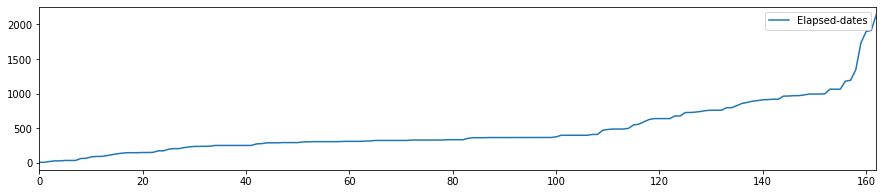

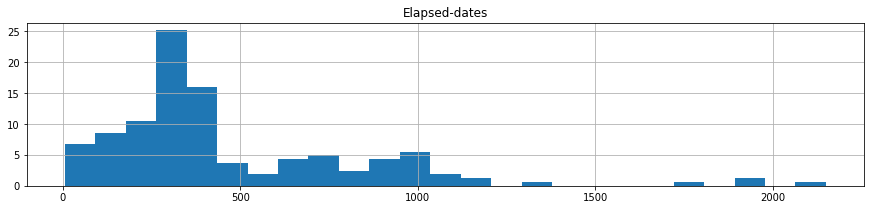

In [46]:
## SATD
dates = pd.DataFrame(Dates(False, True), columns=["Elapsed-dates"])

display(df)

dates["Elapsed-dates"] = dates["Elapsed-dates"].apply(lambda dt: int(dt.split(" day")[0]))
dates.sort_values(by="Elapsed-dates", inplace=True)
dates = dates[dates["Elapsed-dates"] >= 0] ## エラーデータ処理
dates.reset_index(drop=True, inplace=True)

dates.plot(figsize=(15, 3));
dates.hist(figsize=(15, 3), bins=25, weights=np.ones_like(dates[dates.columns[0]]) * 100. / len(dates));

TypeError: 'NoneType' object is not iterable